In [ ]:
# This project is based on Neural Style Transfer of one image(style image) to another image(content image). 
# Here, we have transferred the style and art of Monalisa image to Rabindranath Tagore image using transfer learning 
# (with pre-trained (trained on imagenet dataset) convolutional neural network (VGG19) of Google)

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.4.1'

## Loading the pre-trained convolutional neural network (VGG19)


In [2]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [3]:
network.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [4]:
len(network.layers)

22

## Loading and pre-processing the images

### Content image

In [5]:
content_image = tf.keras.preprocessing.image.load_img('Rabindranath-Tagore2.jpg')

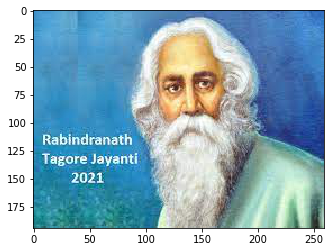

In [6]:
plt.imshow(content_image)

In [7]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [9]:
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (194, 259, 3), 0.0, 255.0)

In [10]:
content_image = content_image / 255

In [11]:
content_image.min(), content_image.max()

(0.0, 1.0)

In [12]:
content_image

array([[[0.23921569, 0.54901963, 0.76862746],
        [0.24313726, 0.5529412 , 0.77254903],
        [0.2509804 , 0.56078434, 0.78039217],
        ...,
        [0.16078432, 0.3647059 , 0.69411767],
        [0.16078432, 0.3647059 , 0.69411767],
        [0.16078432, 0.3647059 , 0.69411767]],

       [[0.23921569, 0.54901963, 0.76862746],
        [0.24313726, 0.5529412 , 0.77254903],
        [0.2509804 , 0.56078434, 0.78039217],
        ...,
        [0.18039216, 0.39607844, 0.72156864],
        [0.18039216, 0.39607844, 0.72156864],
        [0.18039216, 0.39607844, 0.72156864]],

       [[0.23529412, 0.5529412 , 0.76862746],
        [0.23921569, 0.5568628 , 0.77254903],
        [0.24705882, 0.5647059 , 0.78039217],
        ...,
        [0.20784314, 0.42745098, 0.7529412 ],
        [0.20784314, 0.42745098, 0.7529412 ],
        [0.20784314, 0.42745098, 0.7529412 ]],

       ...,

       [[0.1882353 , 0.5529412 , 0.58431375],
        [0.15294118, 0.5176471 , 0.54901963],
        [0.15686275, 0

In [13]:
# Adding extra dimension.....
content_image = content_image[tf.newaxis, :]

In [14]:
content_image.shape

(1, 194, 259, 3)

### Style image

In [15]:
style_image = tf.keras.preprocessing.image.load_img('Monalisa1.jpg')

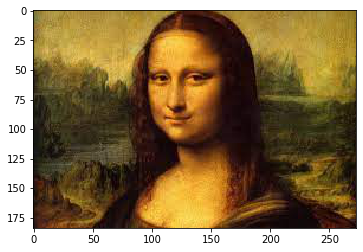

In [16]:
plt.imshow(style_image);

In [17]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape

(1, 184, 273, 3)

## Building the neural network

In [18]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']

In [19]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)
print(num_content_layers, num_style_layers)

1 5


In [20]:
[network.get_layer(name).output for name in style_layers]

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [21]:
network.input

<KerasTensor: shape=(None, None, None, 3) dtype=float32 (created by layer 'input_1')>

In [22]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)

  return network

In [23]:
style_extractor = vgg_layers(style_layers)

In [24]:
style_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [25]:
style_extractor.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [26]:
style_outputs = style_extractor(style_image)

In [27]:
len(style_outputs)

5

In [28]:
style_outputs[1]

<tf.Tensor: shape=(1, 92, 136, 128), dtype=float32, numpy=
array([[[[ 0.        ,  0.        ,  0.        , ...,  5.3694315 ,
           0.        , 10.359984  ],
         [ 0.        ,  0.        ,  0.648023  , ...,  2.6421487 ,
           0.        ,  0.12345426],
         [ 0.        ,  0.        ,  0.7227402 , ...,  4.0844893 ,
           0.        ,  1.2344625 ],
         ...,
         [ 0.        ,  0.        ,  0.9485251 , ...,  3.597872  ,
           0.        ,  0.77427167],
         [ 0.        ,  0.        ,  0.4462827 , ...,  4.2052364 ,
           0.        ,  1.36767   ],
         [ 0.        ,  0.        ,  4.464161  , ...,  8.2455635 ,
           0.11741103,  0.        ]],

        [[ 0.        ,  3.9730117 ,  0.        , ...,  5.010216  ,
           0.30761284, 10.940034  ],
         [ 0.        ,  4.563849  ,  0.        , ...,  0.4811524 ,
           1.9356745 ,  0.        ],
         [ 0.        ,  4.208806  ,  0.        , ...,  2.8832395 ,
           1.9729542 ,  0.

In [29]:
style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape, style_outputs[4].shape

(TensorShape([1, 184, 273, 64]),
 TensorShape([1, 92, 136, 128]),
 TensorShape([1, 46, 68, 256]),
 TensorShape([1, 23, 34, 512]),
 TensorShape([1, 11, 17, 512]))

In [30]:
# https://www.tensorflow.org/api_docs/python/tf/einsum

def gram_matrix(layer_activation):
  result = tf.linalg.einsum('bijc,bijd->bcd', layer_activation, layer_activation)
  input_shape = tf.shape(layer_activation)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)

  return result / num_locations

In [31]:
style_outputs[0]

<tf.Tensor: shape=(1, 184, 273, 64), dtype=float32, numpy=
array([[[[0.        , 0.27417263, 0.15528321, ..., 0.6699095 ,
          0.5331051 , 0.2697156 ],
         [0.        , 0.41543767, 0.39313993, ..., 0.44805026,
          1.1687918 , 0.8914093 ],
         [0.        , 0.41439644, 0.37269157, ..., 0.3902362 ,
          1.112491  , 0.8047852 ],
         ...,
         [0.        , 0.50081867, 0.4360641 , ..., 0.4454146 ,
          1.2006468 , 0.9157328 ],
         [0.        , 0.47634724, 0.40258497, ..., 0.44616365,
          1.1219245 , 0.83380514],
         [0.73777413, 0.43923274, 0.51625586, ..., 0.73210126,
          1.5609297 , 1.4572892 ]],

        [[0.        , 0.34648865, 0.11569791, ..., 0.40739548,
          0.        , 0.        ],
         [0.72424364, 0.53504443, 0.4030528 , ..., 0.06879365,
          0.4759321 , 0.47857592],
         [0.6240297 , 0.5373407 , 0.37642905, ..., 0.        ,
          0.37947783, 0.36133993],
         ...,
         [0.8093517 , 0.66794

In [32]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.57551324, 0.36684334, 0.23493895, ..., 0.30608305,
         0.35497895, 0.3410712 ],
        [0.36684334, 0.32621452, 0.21033789, ..., 0.11210732,
         0.24120496, 0.23078848],
        [0.23493895, 0.21033789, 0.13831933, ..., 0.06428432,
         0.15547763, 0.15035273],
        ...,
        [0.30608305, 0.11210732, 0.06428432, ..., 0.2951364 ,
         0.19914953, 0.17843904],
        [0.35497895, 0.24120496, 0.15547763, ..., 0.19914953,
         0.24819899, 0.23000269],
        [0.3410712 , 0.23078848, 0.15035273, ..., 0.17843904,
         0.23000269, 0.21745986]]], dtype=float32)>

In [33]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super().__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    inputs = inputs * 255.0
    # 0 - 1
    # -127.50 - 127.50
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs = outputs[:self.num_style_layers]
    content_outputs = outputs[self.num_style_layers:]

    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

    content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
    style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [34]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [35]:
extractor = StyleContentModel(style_layers, content_layers)

In [36]:
results = extractor(content_image)

In [37]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 24, 32, 512), dtype=float32, numpy=
  array([[[[  88.794044 ,    0.       ,    0.       , ...,  945.4437   ,
            1201.4999   ,    0.       ],
           [   0.       ,    0.       ,    9.301787 , ...,  415.46518  ,
             755.1146   ,    0.       ],
           [   0.       ,    0.       ,  654.48047  , ...,    0.       ,
            1041.7997   ,    0.       ],
           ...,
           [  23.919138 ,    0.       ,  717.9644   , ...,  154.7609   ,
             820.5998   ,    0.       ],
           [ 440.5646   ,    0.       ,  103.516495 , ...,    0.       ,
             560.8967   ,    0.       ],
           [ 383.36926  ,    0.       ,    0.       , ...,  482.53275  ,
             326.1494   ,  370.2606   ]],
  
          [[   0.       ,    0.       ,    0.       , ...,  460.15027  ,
            1942.4071   ,    0.       ],
           [   0.       ,    0.       ,    0.       , ...,    0.       ,
            1571.3699 

In [38]:
for key, value in results.items():
  print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [39]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [40]:
len(style_targets), len(content_targets)

(5, 1)

In [41]:
new_image = tf.Variable(content_image)

In [42]:
# How much style will be transferred
content_weight = 1
style_weight = 10

In [43]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)

## Training

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

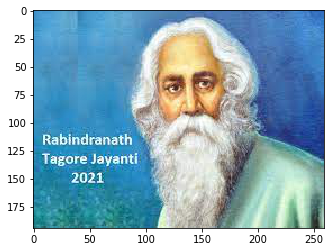

In [45]:
plt.imshow(tf.squeeze(content_image, axis = 0))

Epoch 100 | content loss: 550215.75 | style loss: 1733376384.0 | total loss 3467302912.0


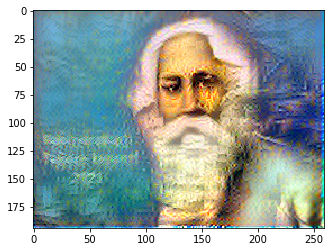

Epoch 200 | content loss: 574332.5 | style loss: 903690496.0 | total loss 1807955200.0


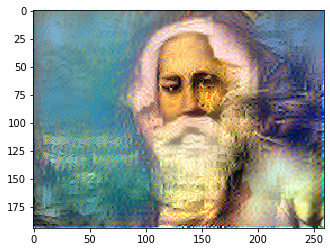

Epoch 300 | content loss: 584843.0625 | style loss: 632211904.0 | total loss 1265008640.0


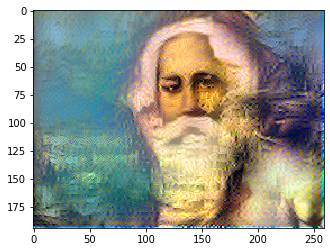

Epoch 400 | content loss: 595191.8125 | style loss: 502680416.0 | total loss 1005956032.0


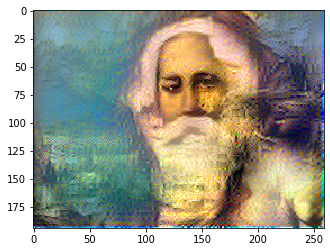

Epoch 500 | content loss: 602599.5625 | style loss: 389736800.0 | total loss 780076224.0


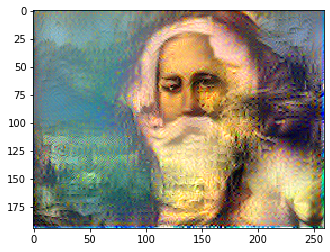

In [46]:
epochs = 500
print_every = 100

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

    total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])

  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
    plt.imshow(tf.squeeze(new_image, axis = 0))
    plt.show()

## Visualizing the results

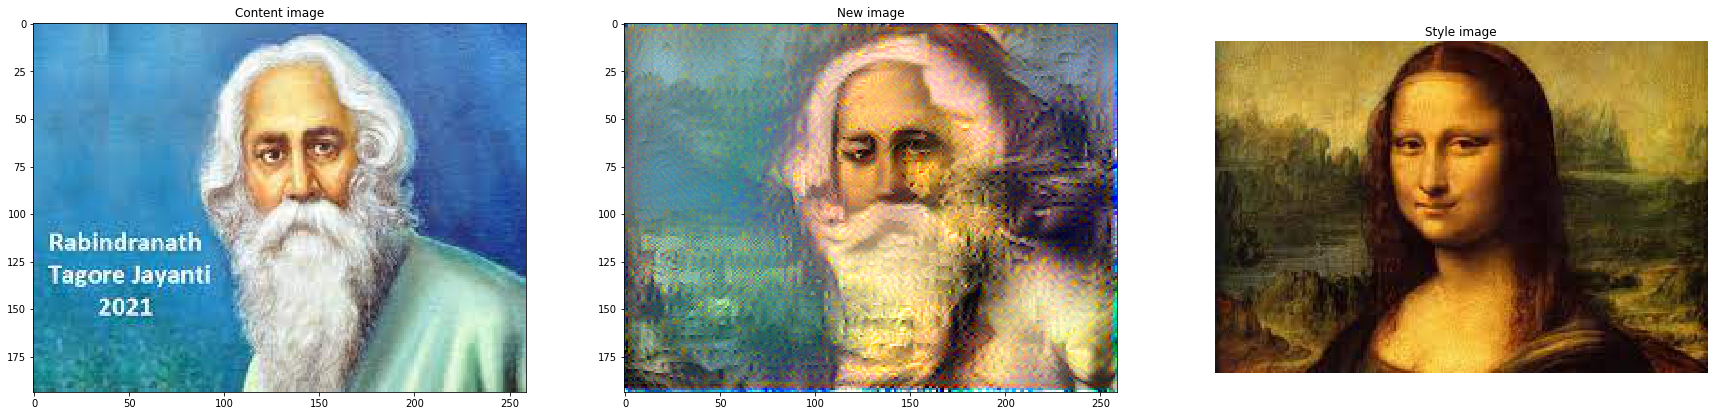

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,8))
ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title('Style image')
plt.axis('off');